<a href="https://colab.research.google.com/github/adithyanperingode/MI-IPL-Match-Result-Prediction/blob/main/Logistic_Regression_V0_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [205]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [206]:
# Load the dataset from Github
Data = pd.read_csv('https://raw.githubusercontent.com/adithyanperingode/MI-IPL-Match-Result-Prediction/main/MI%20IPL%20Data_Post%20EDA.csv')
Data.head()

,Sr No,Time,MI_Match No,Match_City,Match_Month,Match_Date,Match Type,Toss,Batting Sequence,Match Score_100,...,No of BlowersBL,No of All Rounders,No of Batsman,Umpire_Sundaram Ravi,Umpire_Anil Chaudhary,Umpire_Nitin Menon,Umpire_Kumar Dharmasena,Umpire_Chris Gaffaney,Umpire_Others,Result
0,1.0,D/N,2.0,Mumbai,May,Odd,Home,Won,2.0,0.0,...,4.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,Win
1,2.0,N,3.0,Mumbai,May,Even,Home,Lost,2.0,0.0,...,3.0,2.0,5.0,0.0,0.0,1.0,0.0,0.0,1.0,Win
2,3.0,N,4.0,Mumbai,May,Odd,Home,Won,2.0,0.0,...,4.0,2.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,Win
3,4.0,N,5.0,Mumbai,Apr,Even,Home,Lost,1.0,0.0,...,4.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,Win
4,5.0,N,6.0,Mumbai,Apr,Even,Home,Won,2.0,0.0,...,3.0,3.0,4.0,0.0,1.0,0.0,0.0,1.0,1.0,Lost


In [207]:
# Extracting the Columns with Categorical Values
categorical_cols = [col for col in Data.columns if Data[col].dtype == 'object']
print(categorical_cols)

['Time ', 'Match_City', 'Match_Month', 'Match_Date', 'Match Type', 'Toss', 'Match_Stadium', 'Captain', 'Head Coach', 'Result']


In [208]:
# Basic information about the dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sr No                    246 non-null    float64
 1   Time                     236 non-null    object 
 2   MI_Match No              246 non-null    float64
 3   Match_City               246 non-null    object 
 4   Match_Month              246 non-null    object 
 5   Match_Date               246 non-null    object 
 6   Match Type               246 non-null    object 
 7   Toss                     246 non-null    object 
 8   Batting Sequence         245 non-null    float64
 9   Match Score_100          246 non-null    float64
 10  Match Score_150          246 non-null    float64
 11  Match Score_200          246 non-null    float64
 12  Match Score_250          246 non-null    float64
 13  Match_Stadium            246 non-null    object 
 14  Captain                  2

In [209]:
# Calaculate null values % in each columns
null_values_percent = (Data.isnull().sum() / Data.shape[0]) * 100
for col, percent in zip(Data.columns, null_values_percent):
    print(f"Column '{col}' has {percent:.2f}% null values.")

Column 'Sr No' has 0.40% null values.
Column 'Time ' has 4.45% null values.
Column 'MI_Match No' has 0.40% null values.
Column 'Match_City' has 0.40% null values.
Column 'Match_Month' has 0.40% null values.
Column 'Match_Date' has 0.40% null values.
Column 'Match Type' has 0.40% null values.
Column 'Toss' has 0.40% null values.
Column 'Batting Sequence' has 0.81% null values.
Column 'Match Score_100' has 0.40% null values.
Column 'Match Score_150' has 0.40% null values.
Column 'Match Score_200' has 0.40% null values.
Column 'Match Score_250' has 0.40% null values.
Column 'Match_Stadium' has 0.40% null values.
Column 'Captain' has 0.40% null values.
Column 'Head Coach' has 0.00% null values.
Column 'No of BlowersBL' has 0.40% null values.
Column 'No of All Rounders' has 0.40% null values.
Column 'No of Batsman' has 0.40% null values.
Column 'Umpire_Sundaram Ravi' has 0.40% null values.
Column 'Umpire_Anil Chaudhary' has 0.40% null values.
Column 'Umpire_Nitin Menon' has 0.40% null value

In [210]:
# Replace the null value in ''Time' with Mode
Data['Time '].fillna(Data['Time '].mode()[0], inplace=True)
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sr No                    246 non-null    float64
 1   Time                     247 non-null    object 
 2   MI_Match No              246 non-null    float64
 3   Match_City               246 non-null    object 
 4   Match_Month              246 non-null    object 
 5   Match_Date               246 non-null    object 
 6   Match Type               246 non-null    object 
 7   Toss                     246 non-null    object 
 8   Batting Sequence         245 non-null    float64
 9   Match Score_100          246 non-null    float64
 10  Match Score_150          246 non-null    float64
 11  Match Score_200          246 non-null    float64
 12  Match Score_250          246 non-null    float64
 13  Match_Stadium            246 non-null    object 
 14  Captain                  2

In [211]:
# Adding One Hot Encoding to 'Time ', 'Match_City', 'Match_Month', 'Match_Date', 'Match Type', 'Toss', 'Match_Stadium', 'Captain', 'Head Coach', 'Result'
Data = pd.get_dummies(Data, columns=['Time ', 'Match_City', 'Match_Month', 'Match_Date', 'Match Type', 'Toss', 'Match_Stadium', 'Captain', 'Head Coach', 'Result'], dtype=int)
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 57 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Sr No                                                   246 non-null    float64
 1   MI_Match No                                             246 non-null    float64
 2   Batting Sequence                                        245 non-null    float64
 3   Match Score_100                                         246 non-null    float64
 4   Match Score_150                                         246 non-null    float64
 5   Match Score_200                                         246 non-null    float64
 6   Match Score_250                                         246 non-null    float64
 7   No of BlowersBL                                         246 non-null    float64
 8   No of All Rounders                      

In [212]:
# Drop null value row from 'Batting Sequence'
Data.dropna(subset=['Batting Sequence'], inplace=True)
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 245 entries, 0 to 245
Data columns (total 57 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Sr No                                                   245 non-null    float64
 1   MI_Match No                                             245 non-null    float64
 2   Batting Sequence                                        245 non-null    float64
 3   Match Score_100                                         245 non-null    float64
 4   Match Score_150                                         245 non-null    float64
 5   Match Score_200                                         245 non-null    float64
 6   Match Score_250                                         245 non-null    float64
 7   No of BlowersBL                                         245 non-null    float64
 8   No of All Rounders                           

In [213]:
# Drop Columns 'Sr No', 'Match Score_250','Umpire_Others','Time _N','Match_City_Others','Match_Date_Odd','Match Type_Away','Toss_Won','Match_Stadium_Others','Captain_Others','Result_Lost' from Data Dataframe
Data = Data.drop(columns=['Sr No', 'Match Score_250','Umpire_Others','Time _N','Match_City_Others','Match_Date_Odd','Match Type_Away','Toss_Won','Match_Stadium_Others','Captain_Others','Result_Lost'], axis=1)
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 245 entries, 0 to 245
Data columns (total 46 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   MI_Match No                                             245 non-null    float64
 1   Batting Sequence                                        245 non-null    float64
 2   Match Score_100                                         245 non-null    float64
 3   Match Score_150                                         245 non-null    float64
 4   Match Score_200                                         245 non-null    float64
 5   No of BlowersBL                                         245 non-null    float64
 6   No of All Rounders                                      245 non-null    float64
 7   No of Batsman                                           245 non-null    float64
 8   Umpire_Sundaram Ravi                         

In [214]:
# Normalize the data except for the 'Result_Win' column
numeric_cols = [col for col in Data.columns if Data[col].dtype in ['int64', 'float64'] and col != 'Result_Win']
for col in numeric_cols:
  Data[col] = (Data[col] - Data[col].min()) / (Data[col].max() - Data[col].min())
Data.head()

,MI_Match No,Batting Sequence,Match Score_100,Match Score_150,Match Score_200,No of BlowersBL,No of All Rounders,No of Batsman,Umpire_Sundaram Ravi,Umpire_Anil Chaudhary,...,Captain_Rohit Sharma,Captain_Sachin Tendulkar,Head Coach_John Wright,Head Coach_Lalchand Rajput,Head Coach_Mahela Jayawardene,Head Coach_Mark Boucher,Head Coach_Ricky Ponting,Head Coach_Robin Singh,Head Coach_Shaun Pollock,Result_Win
0,0.055556,1.0,0.0,0.0,1.0,0.6,0.333333,0.4,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1,0.111111,1.0,0.0,0.0,0.0,0.4,0.333333,0.6,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,0.166667,1.0,0.0,0.0,1.0,0.6,0.333333,0.4,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
3,0.222222,0.0,0.0,0.0,0.0,0.6,0.500000,0.2,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
4,0.277778,1.0,0.0,0.0,0.0,0.4,0.500000,0.4,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


<Axes: >

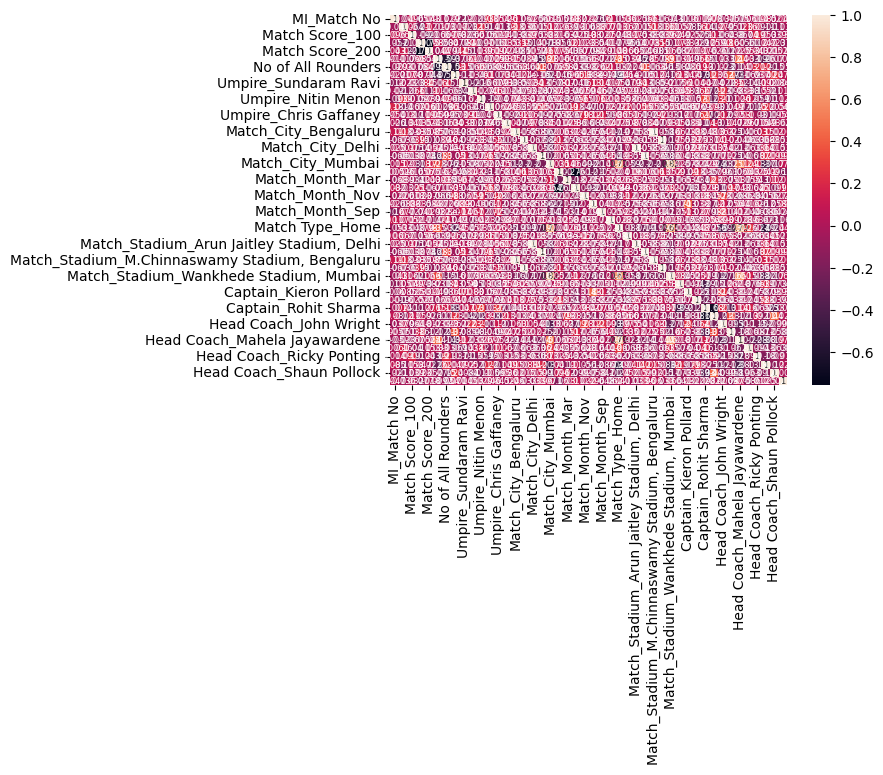

In [215]:
corr_matrix = Data.corr()
sns.heatmap(corr_matrix, annot=True, annot_kws={"fontsize":6})

In [216]:
X =Data.loc[:, Data.columns != 'Result_Win']
y = Data['Result_Win']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [217]:
m1 = LogisticRegression(C=10,max_iter=500).fit(X_train, y_train)

In [218]:
m1.coef_

array([[-0.22910169, -0.59282991, -0.83732183, -0.79378528, -0.54923828,
        -0.73123167, -0.73011011,  1.61588387,  0.30283935,  0.45254675,
         0.30280075, -0.0469448 ,  0.97305369,  0.20444638,  1.00931913,
         0.45408396, -0.13452972,  0.66188259,  1.1226069 , -0.37788013,
        -0.18989699,  0.2680137 , -0.84016766,  1.30750307, -0.16148623,
        -0.13807989, -0.20241961, -0.29550478, -0.13452972,  0.66188259,
         1.00931913,  0.45408396,  0.43912103,  0.30686196, -1.01473682,
        -0.64304231, -0.30157553,  0.4190142 ,  0.58599704, -1.10735683,
         0.16203805, -0.81975363,  0.3681325 ,  0.24352012,  0.5735085 ]])

In [219]:
m1.intercept_

array([0.91605401])

In [220]:
pred = m1.predict(X_test)
pred

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1])

In [221]:
X_test.head()

,MI_Match No,Batting Sequence,Match Score_100,Match Score_150,Match Score_200,No of BlowersBL,No of All Rounders,No of Batsman,Umpire_Sundaram Ravi,Umpire_Anil Chaudhary,...,Captain_Ricky Ponting,Captain_Rohit Sharma,Captain_Sachin Tendulkar,Head Coach_John Wright,Head Coach_Lalchand Rajput,Head Coach_Mahela Jayawardene,Head Coach_Mark Boucher,Head Coach_Ricky Ponting,Head Coach_Robin Singh,Head Coach_Shaun Pollock
67,0.500000,1.0,0.0,0.0,1.0,0.8,0.333333,0.2,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
245,0.722222,1.0,0.0,1.0,0.0,0.6,0.000000,0.8,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
208,0.333333,0.0,0.0,1.0,0.0,0.8,0.333333,0.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
222,0.222222,0.0,0.0,0.0,1.0,0.6,0.166667,0.6,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
90,0.111111,1.0,0.0,0.0,1.0,0.8,0.333333,0.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [222]:
X_test['Result_Win'] = y_test
X_test.head()

,MI_Match No,Batting Sequence,Match Score_100,Match Score_150,Match Score_200,No of BlowersBL,No of All Rounders,No of Batsman,Umpire_Sundaram Ravi,Umpire_Anil Chaudhary,...,Captain_Rohit Sharma,Captain_Sachin Tendulkar,Head Coach_John Wright,Head Coach_Lalchand Rajput,Head Coach_Mahela Jayawardene,Head Coach_Mark Boucher,Head Coach_Ricky Ponting,Head Coach_Robin Singh,Head Coach_Shaun Pollock,Result_Win
67,0.500000,1.0,0.0,0.0,1.0,0.8,0.333333,0.2,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
245,0.722222,1.0,0.0,1.0,0.0,0.6,0.000000,0.8,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
208,0.333333,0.0,0.0,1.0,0.0,0.8,0.333333,0.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
222,0.222222,0.0,0.0,0.0,1.0,0.6,0.166667,0.6,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
90,0.111111,1.0,0.0,0.0,1.0,0.8,0.333333,0.2,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [223]:
X_test['Prediction'] = pred
X_test.head()

,MI_Match No,Batting Sequence,Match Score_100,Match Score_150,Match Score_200,No of BlowersBL,No of All Rounders,No of Batsman,Umpire_Sundaram Ravi,Umpire_Anil Chaudhary,...,Captain_Sachin Tendulkar,Head Coach_John Wright,Head Coach_Lalchand Rajput,Head Coach_Mahela Jayawardene,Head Coach_Mark Boucher,Head Coach_Ricky Ponting,Head Coach_Robin Singh,Head Coach_Shaun Pollock,Result_Win,Prediction
67,0.500000,1.0,0.0,0.0,1.0,0.8,0.333333,0.2,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1
245,0.722222,1.0,0.0,1.0,0.0,0.6,0.000000,0.8,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1
208,0.333333,0.0,0.0,1.0,0.0,0.8,0.333333,0.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1
222,0.222222,0.0,0.0,0.0,1.0,0.6,0.166667,0.6,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1
90,0.111111,1.0,0.0,0.0,1.0,0.8,0.333333,0.2,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1


In [224]:
X_test['Correct'] = 1 - ((X_test['Result_Win'] - X_test['Prediction']).abs())
X_test.head()

,MI_Match No,Batting Sequence,Match Score_100,Match Score_150,Match Score_200,No of BlowersBL,No of All Rounders,No of Batsman,Umpire_Sundaram Ravi,Umpire_Anil Chaudhary,...,Head Coach_John Wright,Head Coach_Lalchand Rajput,Head Coach_Mahela Jayawardene,Head Coach_Mark Boucher,Head Coach_Ricky Ponting,Head Coach_Robin Singh,Head Coach_Shaun Pollock,Result_Win,Prediction,Correct
67,0.500000,1.0,0.0,0.0,1.0,0.8,0.333333,0.2,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,1
245,0.722222,1.0,0.0,1.0,0.0,0.6,0.000000,0.8,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,1
208,0.333333,0.0,0.0,1.0,0.0,0.8,0.333333,0.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,1
222,0.222222,0.0,0.0,0.0,1.0,0.6,0.166667,0.6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0
90,0.111111,1.0,0.0,0.0,1.0,0.8,0.333333,0.2,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,1


In [225]:
labels = np.unique(y_test)
cm = confusion_matrix(y_test, pred, labels=labels)
pd.DataFrame(cm, index=labels, columns=labels)

,0,1
0,11,28
1,6,29


In [226]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.65      0.28      0.39        39
           1       0.51      0.83      0.63        35

    accuracy                           0.54        74
   macro avg       0.58      0.56      0.51        74
weighted avg       0.58      0.54      0.51        74



In [227]:
accuracy = metrics.accuracy_score(y_test, pred)
Precision = metrics.precision_score(y_test, pred)
Recall = metrics.recall_score(y_test, pred)
print("Accuracy :",accuracy)
print("Precision:",Precision)
print("Recall   :",Recall)

Accuracy : 0.5405405405405406
Precision: 0.5087719298245614
Recall   : 0.8285714285714286


In [228]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': m1.coef_[0]})

In [229]:
importances = importances.sort_values(by='Importance', ascending=False)
importances

,Attribute,Importance
7,No of Batsman,1.615884
23,Match_Month_Oct,1.307503
18,Match_City_Mumbai,1.122607
30,"Match_Stadium_M.Chinnaswamy Stadium, Bengaluru",1.009319
14,Match_City_Bengaluru,1.009319
12,Umpire_Chris Gaffaney,0.973054
29,"Match_Stadium_Eden Gardens, Kolkata",0.661883
17,Match_City_Kolkata,0.661883
38,Head Coach_John Wright,0.585997
44,Head Coach_Shaun Pollock,0.573509
